In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
pd.options.display.max_rows = 999
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
%matplotlib inline

In [51]:
house_data = pd.read_csv("data/20151014211444871494_dataset.csv", names=("Name", "MB", "Year", "House", "GPA"),index_col=False)
house_data_test = pd.read_csv("data/20151014211444871494_dataset.csv", names=("Name", "MB", "Year", "House", "GPA"),index_col=False)
house_data_org = pd.read_csv("data/20151014211444871494_dataset.csv", names=("Name", "MB", "Year", "House", "GPA"),index_col=False)

house_datad = pd.get_dummies(house_data, columns=["MB", "House"])

inputs = house_datad[['MB_ENFJ', 'MB_ENFP', 'MB_ENTJ', 
                       'MB_ENTP', 'MB_ESFJ', 'MB_ESFP', 'MB_ESTJ', 
                       'MB_ESTP', 'MB_INFJ', 'MB_INFP', 'MB_INTJ', 
                       'MB_INTP', 'MB_ISFJ', 'MB_ISFP', 'MB_ISTJ', 
                       'MB_ISTP', 'House_Gryffindor', 'House_Hufflepuff', 
                       'House_Ravenclaw', 'House_Slytherin']]
#gpa = house_datad.GPAY
gpa = np.asarray(house_datad['GPA'], dtype="|S6")
gnb.fit(inputs, gpa)

gnb.predict([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])

In [52]:
house_dict = {'Gryffindor': 2, 'Hufflepuff': 4, 'Ravenclaw': 1, 'Slytherin': 3}
mb_dict = {'ENFJ': 1, 'ENFP': 2, 'ENTJ': 3, 'ENTP': 4, 'ESFJ': 5, 'ESFP': 6, 'ESTJ': 7, 'ESTP': 8, 'INFJ': 9, 'INFP': 10, 'INTJ': 11, 'INTP': 12, 'ISFJ': 13, 'ISFP': 14, 'ISTJ': 15, 'ISTP': 16}
rev_house_dict = {val: key for key, val in house_dict.items()}
rev_mb_dict = {val: key for key, val in mb_dict.items()}

In [53]:
house_data_test.MB = house_data_test.MB.map(mb_dict)
house_data.House = house_data.House.map(house_dict)
house_data.MB = house_data.MB.map(mb_dict)

In [54]:
def truncate(floats):
    return float("{0:.2f}".format(floats))

In [55]:
house_data.GPA = house_data.GPA.map(truncate)
house_data_test.GPA = house_data.GPA.map(truncate)
house_data_org.GPA = house_data.GPA.map(truncate)

In [61]:
Ravenclaw = house_data_test[house_data_test.House == "Ravenclaw"]
Gryffindor = house_data_test[house_data_test.House == "Gryffindor"]
Hufflepuff = house_data_test[house_data_test.House == "Hufflepuff"]
Slytherin = house_data_test[house_data_test.House == "Slytherin"]

gpa_by_mb = []
for house in [Ravenclaw, Gryffindor, Hufflepuff, Slytherin]
    for personality type in mb_dict:
        gpa_by_mb.append(house[personality])
    gpa

/Users/MatthewBarnette/iron_yard_hw/sorting-hat/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


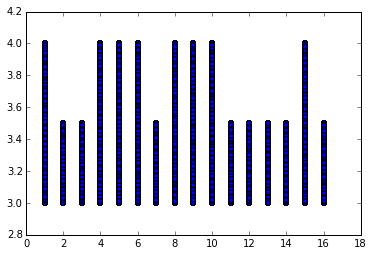

In [62]:
plt.scatter(house_data.MB, house_data.GPA)

/Users/MatthewBarnette/iron_yard_hw/sorting-hat/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


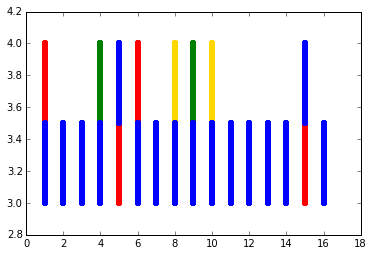

In [63]:
plt.scatter(Slytherin.MB, Slytherin.GPA, color = "Green")
plt.scatter(Hufflepuff.MB, Hufflepuff.GPA, color = "Gold")
plt.scatter(Gryffindor.MB, Gryffindor.GPA, color = "Red")
plt.scatter(Ravenclaw.MB, Ravenclaw.GPA, color = "Blue")

print(house_dict)
print(mb_dict)

In [ ]:
pivot_house = pd.pivot_table(house_data_org, index=["MB", "House"], values=["GPA"])

In [100]:
pivot_house

GPA
MB   House               
ENFJ Gryffindor  3.750552
     Hufflepuff  3.255105
     Ravenclaw   3.249794
     Slytherin   3.251594
ENFP Gryffindor  3.246789
     Hufflepuff  3.253859
     Ravenclaw   3.248578
     Slytherin   3.254471
ENTJ Gryffindor  3.252988
     Hufflepuff  3.249235
     Ravenclaw   3.245599
     Slytherin   3.248881
ENTP Gryffindor  3.247177
     Hufflepuff  3.252886
     Ravenclaw   3.248428
     Slytherin   3.748401
ESFJ Gryffindor  3.254814
     Hufflepuff  3.248874
     Ravenclaw   3.750071
     Slytherin   3.248517
ESFP Gryffindor  3.749226
     Hufflepuff  3.254829
     Ravenclaw   3.249089
     Slytherin   3.253565
ESTJ Gryffindor  3.252167
     Hufflepuff  3.246099
     Ravenclaw   3.248354
     Slytherin   3.246143
ESTP Gryffindor  3.250391
     Hufflepuff  3.753234
     Ravenclaw   3.252345
     Slytherin   3.245624
INFJ Gryffindor  3.246427
     Hufflepuff  3.247907
     Ravenclaw   3.249694
     Slytherin   3.749688
INFP Gryffindor  3.250168
     Hufflepuff  3.748948
     Ravenclaw   3.250069
     Slytherin   3.247019
INTJ Gryffindor  3.251442
     Hufflepuff  3.248991
     Ravenclaw   3.253827
     Slytherin   3.250485
INTP Gryffindor  3.249407
     Hufflepuff  3.249129
     Ravenclaw   3.248398
     Slytherin   3.247976
ISFJ Gryffindor  3.250035
     Hufflepuff  3.247213
     Ravenclaw   3.251208
     Slytherin   3.249154
ISFP Gryffindor  3.253557
     Hufflepuff  3.253105
     Ravenclaw   3.249888
     Slytherin   3.250312
ISTJ Gryffindor  3.253255
     Hufflepuff  3.253729
     Ravenclaw   3.748251
     Slytherin   3.243001
ISTP Gryffindor  3.249348
     Hufflepuff  3.252146
     Ravenclaw   3.251328
     Slytherin   3.246872

In [64]:
inputs = house_data[["MB", "GPA"]]
house = house_data.House
clf = svm.SVC()
clf.fit(inputs, house)

/Users/MatthewBarnette/iron_yard_hw/sorting-hat/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
clf.score(inputs, house)

0.46591161223954658

In [103]:
for x in range(1, 17):
    print(rev_mb_dict[x], rev_house_dict[clf.predict([x, 3.5])[0]])

ENFJ Gryffindor
ENFP Slytherin
ENTJ Gryffindor
ENTP Slytherin
ESFJ Ravenclaw
ESFP Gryffindor
ESTJ Gryffindor
ESTP Hufflepuff
INFJ Slytherin
INFP Hufflepuff
INTJ Ravenclaw
INTP Ravenclaw
ISFJ Ravenclaw
ISFP Ravenclaw
ISTJ Ravenclaw
ISTP Ravenclaw


# G, s, g, S, R, G, g, H, S, H, r, g, r, g, R, h

In [150]:
next_year = pd.read_csv("data/20151014211444871494_students_2016.csv", names=("Name", "MB", "Year"),index_col=False)

In [151]:
next_year = next_year[next_year["Year"] < 7]

In [152]:
next_year["MB"] = next_year["MB"].map(mb_dict)

In [146]:
def add_house():
    mb_list = list(next_year["MB"])
    predict_list = []
    pred_list = []
    for item in mb_list:
        predict_list.append(clf.predict([item, 3.7])[0])
    for item in predict_list:
        pred_list.append(rev_house_dict[item])
    next_year['House'] = pred_list

In [153]:
add_house()

In [156]:
next_year.to_csv("data/house_placement.csv", index=False)